In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [2]:
df = pd.read_csv('DATA.csv', index_col=0)
df['expiration_C']=pd.to_datetime(df['expiration_C'])

In [9]:
df = df[['quote_date', 'strike', 'implied_S_y']]

In [10]:
df.head()

,quote_date,strike,implied_S_y
0,2018-01-12,5400.0,6751.233067
1,2018-01-12,5500.0,6751.233067
2,2018-01-12,5600.0,6751.233067
3,2018-01-12,5700.0,6751.233067
4,2018-01-12,5800.0,6751.233067


In [13]:
df_max = df.groupby(['quote_date'])['strike'].max()
df_min = df.groupby(['quote_date'])['strike'].min()
df_atm = df.groupby(['quote_date'])['implied_S_y'].mean()

In [58]:
newdf = pd.concat([df_max, df_min, df_atm], axis=1)
newdf.columns = ['strike_max', 'strike_min', 'implied_S_y']

In [62]:
newdf.index = pd.to_datetime(newdf.index)

In [63]:
nasdaq = pd.read_csv('NASDAQ.csv')
nasdaq['Date']=pd.to_datetime(nasdaq['Date'])
nasdaq.set_index('Date', inplace=True)

In [64]:
newdf = pd.merge(newdf, nasdaq, how='left', left_index=True, right_index=True)

In [72]:
X = newdf[['strike_max', 'strike_min', 'implied_S_y']].to_numpy()
y = newdf['Close/Last']

In [75]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y,X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Close/Last   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.031e+05
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          2.86e-110
Time:                        21:33:35   Log-Likelihood:                -255.84
No. Observations:                  56   AIC:                             519.7
Df Residuals:                      52   BIC:                             527.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2868     12.749     -0.101      0.9

In [77]:
print("Parameters: ", res.params)

Parameters:  const   -1.286823
x1      -0.007193
x2      -0.000199
x3       1.009823
dtype: float64


In [84]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X, y)
print('coefficients:', linreg.coef_)
print('intercept:', linreg.intercept_)
print('R^2 score:', linreg.score(X, y))

coefficients: [ 0.00000000e+00 -7.19281159e-03 -1.99022419e-04  1.00982323e+00]
intercept: -1.2868234118905093
R^2 score: 0.9999428071657079


In [85]:
y_pred = linreg.predict(X)

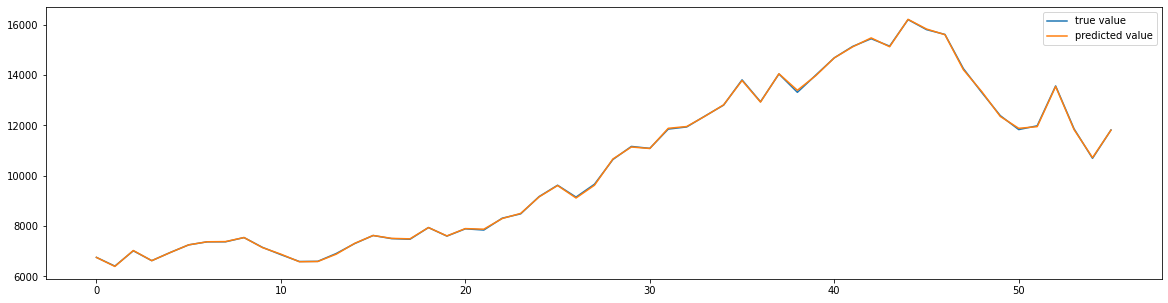

In [102]:
plt.figure(figsize=(20,5))
plt.plot(y.values, label='true value')
plt.plot(y_pred, label = 'predicted value') 
plt.legend()
plt.show()

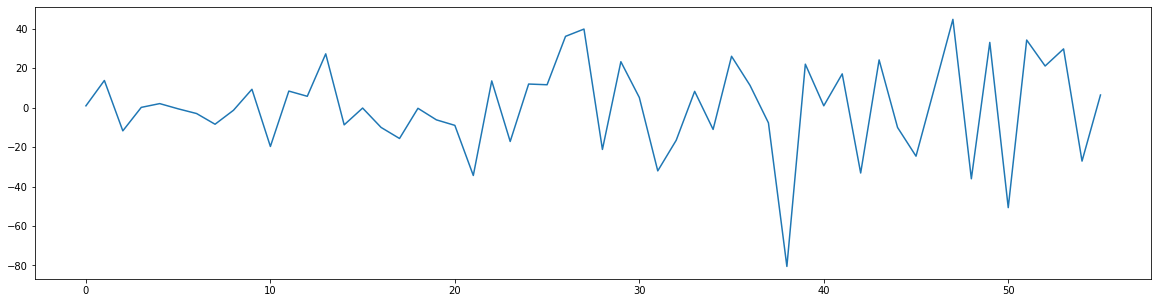

In [103]:
plt.figure(figsize=(20,5))
plt.plot(y.values-y_pred, label='error')
plt.show()